# NLP Sentiment Classification Project

## Dataset Overview
### Read the dataset and write it into a two-dimensional Dataframe using a pandas library

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('yelp.csv')

### Display the first 10 rows

In [3]:
df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


### Let's look at our columns

In [4]:
print(df.columns)

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


### Dataset summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### Let's plot a histogram to check the length of the review texts

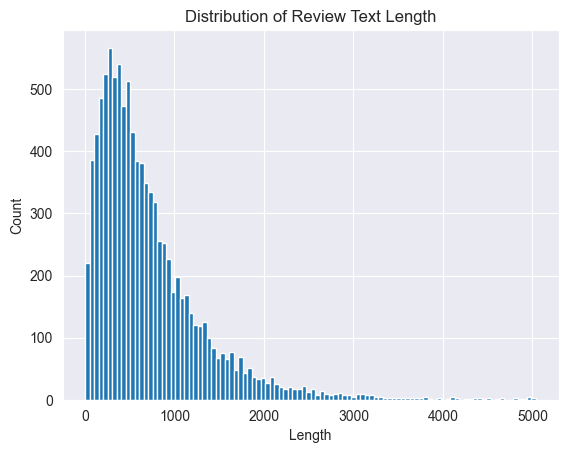

In [6]:
from matplotlib import pyplot as plt
df.text.str.len().hist(bins=100)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Review Text Length")
plt.show()

### Checking random index review rating and its text representation

In [7]:
N = 200
print("Sample review rating:", df.iloc[N].stars)
print("Sample review text:", df.iloc[N].text)

Sample review rating: 5
Sample review text: Who dosen't like Cosco, I love this place. The pizza is cheap and good.


### Let's see how many reviews fall into each rating category using seaborn's displot

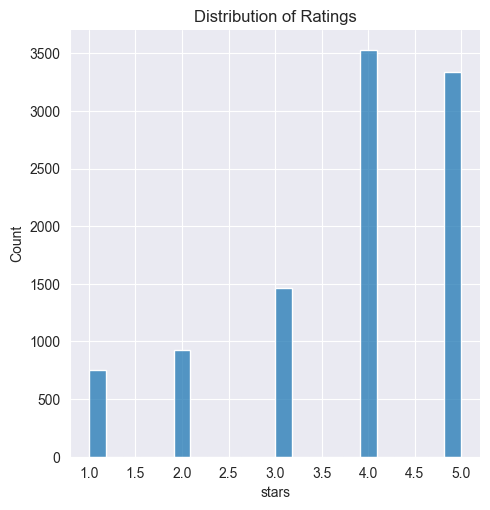

In [8]:
import seaborn as sns
sns.displot(df["stars"])
plt.title("Distribution of Ratings")
plt.show()

## Text Vectorization using sentence embedding method
### Initialize 4 different strings

In [9]:
text_a = "Nobuo shows his unique talents with everything on the menu. Carefully crafted features with much to drink. Start with the pork belly buns and a stout. Then go on until you can no longer."
text_b = "Great food and service! Country food at its best!"
text_c = "Yes I do rock the hipster joints.  I dig this place.  A little bit of a scene, but the food is solid and the service is great. Hard not like it.  All in all a great spot.  I tend to switch up my favorites but I typically hit this up for breakfast when in the 602."
text_d = "It's just fun and I'll be back ! Very chill."

### Import scikit-learn text feature extraction to get its numeric representation and store it in vectorizer variable

In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from tqdm import tqdm
from torch import nn, optim
import pandas as pd
vectorizer = CountVectorizer()
corpus = [text_a, text_b, text_c, text_d]
X = vectorizer.fit_transform(corpus)
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(df['text']).toarray()
# y = (df['stars'] > 3).astype(int).values

In [11]:
X.toarray()

array([[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 3, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 4, 0, 2,
        1, 1, 0, 0, 2, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
vectorizer.get_feature_names_out()

array(['602', 'all', 'and', 'at', 'back', 'be', 'belly', 'best', 'bit',
       'breakfast', 'buns', 'but', 'can', 'carefully', 'chill', 'country',
       'crafted', 'dig', 'do', 'drink', 'everything', 'favorites',
       'features', 'food', 'for', 'fun', 'go', 'great', 'hard', 'hipster',
       'his', 'hit', 'in', 'is', 'it', 'its', 'joints', 'just', 'like',
       'little', 'll', 'longer', 'menu', 'much', 'my', 'no', 'nobuo',
       'not', 'of', 'on', 'place', 'pork', 'rock', 'scene', 'service',
       'shows', 'solid', 'spot', 'start', 'stout', 'switch', 'talents',
       'tend', 'the', 'then', 'this', 'to', 'typically', 'unique',
       'until', 'up', 'very', 'when', 'with', 'yes', 'you'], dtype=object)

### Converting initialized four strings to matrix token counts;
 the result is stored in sparse matrix of variable X

In [13]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# train_dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
# val_dataset = TensorDataset(torch.Tensor(X_val), torch.Tensor(y_val))

In [15]:
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

## Encode our four initial strings into their embeddings using a sentence transformers model

In [16]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

C:\python\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [17]:
embedding_a = model.encode(text_a)
embedding_b = model.encode(text_b)
embedding_c = model.encode(text_c)
embedding_d = model.encode(text_d)

In [18]:
import numpy as np 
len(embedding_a)

384

In [19]:
np.linalg.norm(embedding_a)

0.9999999

In [20]:
from typing import List 
import sentence_transformers
from sentence_transformers import SentenceTransformer
sentence_transformer = SentenceTransformer("all-MiniLM-L6-v2")


def get_text_embeddings(encoder, text: List[str]) -> List[np.ndarray]:
    return encoder.encode(text)

C:\python\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### The function reads the first 100 rows from our Dataframe and asserts if there are exactly 100 rows 

In [21]:
df = pd.read_csv('yelp.csv')

In [22]:
# df = df[(df["stars"] == 1) | (df["stars"] == 5)]
# df["label"] = df["stars"].map({1: 0, 5: 1})
# 
# X_Data = df["text"]
# Y_Data = df["label"]

In [23]:
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(df['text']).toarray()
# y = (df['stars'] > 3).astype(int).values

In [24]:
import pandas as pd 
df = pd.read_csv("yelp.csv", nrows=100)
assert len(df) == 100

In [25]:
df = df[(df["stars"] == 1) | (df["stars"] == 5)]
df["label"] = df["stars"].map({1: 0, 5: 1})

X_Data = df["text"]
Y_Data = df["label"]

In [26]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']).toarray()
y = (df['stars'] > 3).astype(int).values

### Take **text** column from our data frame and convert it to a list

In [27]:
texts = df.text.tolist()

In [28]:
embeddings = get_text_embeddings(sentence_transformer, texts)

### Check the shape of embeddings, length of first embedding, and its norm

In [29]:
embeddings.shape

(43, 384)

In [30]:
len(embeddings[0])

384

In [31]:
np.linalg.norm(embeddings[0])

1.0

### Let's add obtained embeddings and write them into binary file using feather function

In [32]:
# df = pd.read_csv("yelp.csv") 

In [33]:
# texts = df.text.tolist()
# assert len(texts) == len(df)

In [34]:
embeddings = get_text_embeddings(sentence_transformer, texts)

In [35]:
df = df.assign(embeddings = [e for e in embeddings])

In [36]:
df.reset_index(inplace=True)
df.to_feather("yelp_with_embeddings.bin")

In [37]:
# import os
# 
# # Ensure OUTPUT_FILE_PATH is correctly defined
# OUTPUT_FILE_PATH = '/'  # substitute this with your file path
# 
# directory = os.path.dirname(OUTPUT_FILE_PATH)
# 
# if directory and not os.path.exists(directory):  # Ensure that directory is not an empty string
#     os.makedirs(directory)
# 
# df.reset_index(inplace=True)
# df.to_feather(OUTPUT_FILE_PATH)

## Train classifier

In [38]:
import torch 
from torch import nn
import numpy as np
class ReviewClassifier(nn.Module):
    def __init__(self):
        super().__init__()        
        self.mlp = nn.Sequential(
            nn.Linear(384, 150),
            nn.ReLU(),
            nn.Linear(150,15),
            nn.ReLU(),
            nn.Linear(15, 1),
            nn.Sigmoid()
        ) 
        
    
    def forward(self, x):        
        return self.mlp(x)

In [39]:
import pandas as pd 
df = pd.read_feather("yelp_with_embeddings.bin")

In [40]:
print(df.columns)

Index(['index', 'business_id', 'date', 'review_id', 'stars', 'text', 'type',
       'user_id', 'cool', 'useful', 'funny', 'label', 'embeddings'],
      dtype='object')


In [41]:
df.embeddings[0]

array([-2.69870944e-02,  1.21111311e-02,  1.03444271e-01,  5.85587509e-02,
       -6.46284074e-02, -1.29983099e-02, -6.94514215e-02, -4.23906147e-02,
       -4.72875908e-02, -7.47565925e-02,  2.75890459e-04, -1.09934034e-02,
       -2.56671179e-02, -6.28251359e-02, -1.99138578e-02, -7.65452906e-02,
        1.74198315e-01, -1.34243011e-01, -1.75687131e-02, -4.12424505e-02,
       -1.09441176e-01, -4.82605360e-02,  4.82458919e-02, -1.33555811e-02,
        5.59582449e-02,  5.01586571e-02,  2.06091087e-02,  4.79414351e-02,
       -4.90631424e-02, -4.00309227e-02, -2.74517331e-02,  6.48624748e-02,
       -4.05024327e-02, -4.38724738e-03, -2.46323422e-02,  4.45185713e-02,
        9.24157798e-02, -1.14275195e-01,  5.28179966e-02, -3.53382406e-04,
        2.43185777e-02, -4.42525484e-02,  5.36391921e-02, -2.23462936e-02,
        2.35288665e-02,  4.34744172e-03, -1.30336965e-02,  4.99515757e-02,
       -1.54166268e-02, -6.97715627e-03, -2.35754997e-02,  2.09902460e-03,
        3.75692472e-02, -

In [42]:
df.embeddings[0].shape

(384,)

In [43]:
df = df.sample(frac=1.0)
train_df = df[:25000]
val_df = df[25000:30000]
test_df = df[30000:]

In [44]:
from torchmetrics import Accuracy
from tqdm.notebook import tqdm 
import numpy as np 
from torch.utils.tensorboard import SummaryWriter

# "setup"
writer = SummaryWriter()
model = ReviewClassifier()
bce_loss = torch.nn.BCELoss()

batch_size = 128
adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
nr_of_epochs = 16
losses = []

# # Convert DataFrames to numpy arrays first, then to tensors
# X_train = np.array(train_df.embeddings.tolist(), dtype=np.float32)
# y_train = np.array(train_df.label.tolist(), dtype=np.float32).reshape(-1, 1)
# train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# 
# X_val = np.array(val_df.embeddings.tolist(), dtype=np.float32)
# y_val = np.array(val_df.label.tolist(), dtype=np.float32).reshape(-1, 1)
# val_dataset = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Training Loop

for epoch in tqdm(range(nr_of_epochs)):
    # shuffle 
    train_df = train_df.sample(frac=1.0)
    current_index = 0 
    while current_index < len(train_df):        
        batch_x = np.array(
            train_df.embeddings[current_index:(current_index + batch_size)].tolist()
        )
        batch_y = np.array(
            train_df.label[current_index: (current_index + batch_size)].tolist()
        )
        
        tensor_batch_x = torch.Tensor(batch_x)
        tensor_batch_y = torch.Tensor(batch_y).reshape(-1, 1)
        
        pred = model.forward(tensor_batch_x)
        loss = bce_loss(pred, tensor_batch_y)
 
        # Backpropagation
        loss.backward() 
        adam_optimizer.step() 
        adam_optimizer.zero_grad()
        
        current_index += batch_size
        losses.append(float(loss.detach().numpy()))
        
    # Validation Loop    
    model.eval()
    metric = Accuracy(task='BINARY')
    for _, eval_row in tqdm(val_df.iterrows(), desc='evaluating'):
        pred = model.forward(
            torch.Tensor(np.array(eval_row.embeddings))
        )
        metric.update(pred, torch.Tensor([eval_row.label]))
    metric_value = metric.compute()
    writer.add_scalar('Accuracy/eval', metric_value, epoch)

  0%|          | 0/16 [00:00<?, ?it/s]

evaluating: 0it [00:00, ?it/s]

C:\python\Lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: The ``compute`` method of metric BinaryAccuracy was called before the ``update`` method which may lead to errors, as metric states have not yet been updated.
  warnings.warn(*args, **kwargs)  # noqa: B028


evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

evaluating: 0it [00:00, ?it/s]

In [45]:
torch.save(model.state_dict(), "review_classifier.bin")

In [46]:
test_df.reset_index().to_feather("test_df.bin")

In [47]:
import torch 
from torch import nn
import numpy as np
class ReviewClassifier(nn.Module):
    def __init__(self):
        super().__init__()        
        self.mlp = nn.Sequential(
            nn.Linear(384, 150),
            nn.ReLU(),
            nn.Linear(150,15),
            nn.ReLU(),
            nn.Linear(15, 1),
            nn.Sigmoid()
        ) 
        
    
    def forward(self, x):        
        return self.mlp(x)

In [48]:
state_dict = torch.load("review_classifier.bin")

In [49]:
model = ReviewClassifier()
model.load_state_dict(state_dict)

<All keys matched successfully>

In [50]:
N = 48
test_example = torch.Tensor(np.array(test_df.embeddings[N]))
print(test_df.text[N])
print("Prawdopodobieństwo pozytywnego sentymentu: ",  round(model.forward(test_example).detach().numpy()[0], 3))

KeyError: 48

In [ ]:
from torchmetrics import Accuracy 

from tqdm import tqdm 
model.eval()
metric = Accuracy(task="binary")
for _, test_row in tqdm(test_df.iterrows(), desc='evaluating'):
    pred = model.forward(
        torch.Tensor(np.array(test_row.embeddings))
    )
    metric.update(pred, torch.Tensor([test_row.label]))
metric_value = metric.compute()

In [ ]:
print(metric_value)